## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\jerry\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:75: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

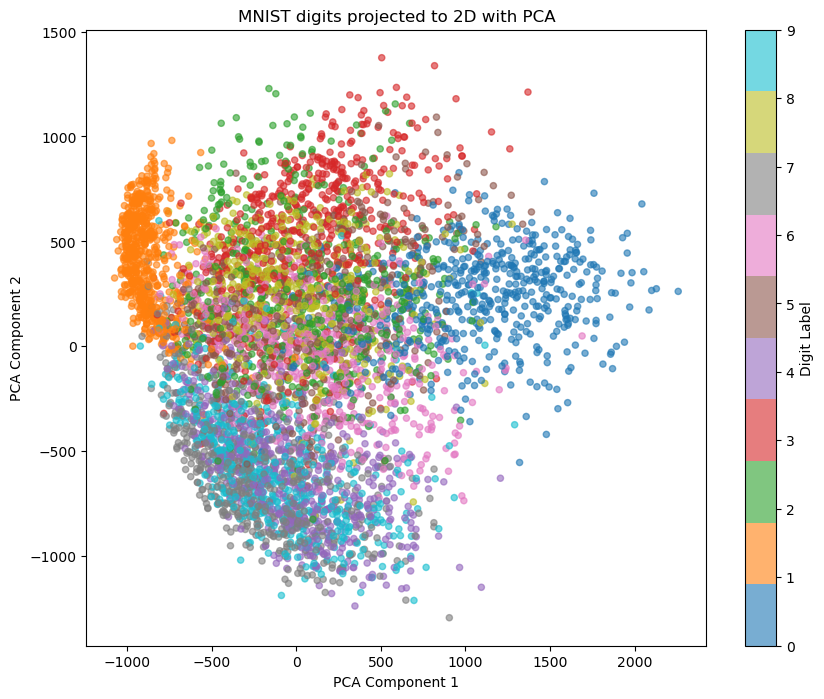

In [3]:
# Your code here

pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_mnist_train)

# Scatter plot
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_vis[:,0], X_vis[:,1], 
                      c=y_mnist_train, 
                      cmap="tab10",  # 10 distinct colors for digits 0–9
                      alpha=0.6, s=20)

# Add colorbar legend
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("MNIST digits projected to 2D with PCA")
plt.show()



#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

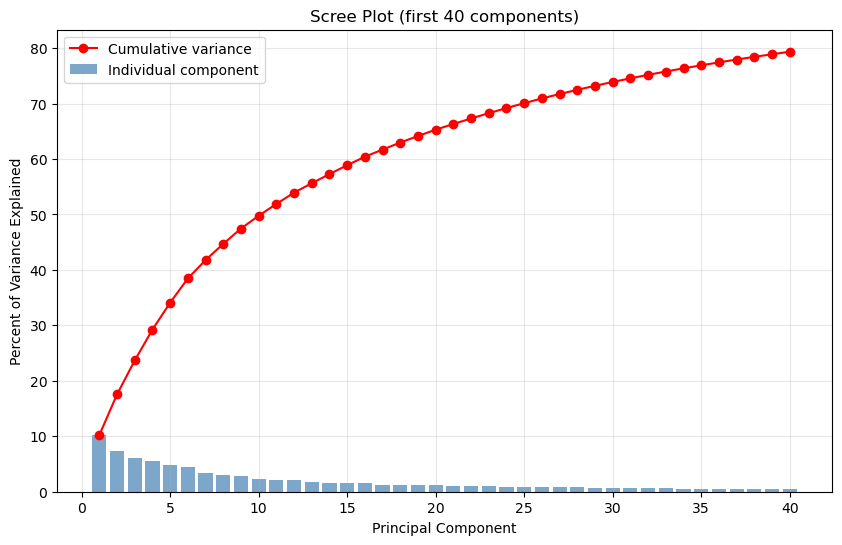

In [4]:
# Your code here
# Fit PCA on the training data
pca = PCA(n_components=40, random_state=42)
pca.fit(X_mnist_train)

# Explained variance ratio (percentage per component)
explained_var = pca.explained_variance_ratio_ * 100  # convert to %

# Plot scree plot
plt.figure(figsize=(10,6))
plt.bar(range(1, 41), explained_var, alpha=0.7, color="steelblue", label="Individual component")
plt.plot(range(1, 41), np.cumsum(explained_var), marker="o", color="red", label="Cumulative variance")

plt.xlabel("Principal Component")
plt.ylabel("Percent of Variance Explained")
plt.title("Scree Plot (first 40 components)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [5]:
# Your code here
# Fit PCA without limiting components
pca_full = PCA().fit(X_mnist_train)

# Cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to explain 95% variance: {n_components_95}")


Number of components to explain 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

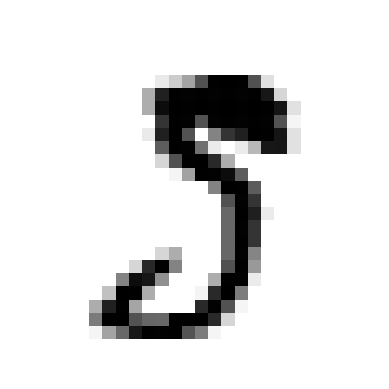

In [6]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

In [15]:
# Your code here
pca_95 = PCA(n_components=148, random_state=42)
X_train_pca = pca_95.fit_transform(X_mnist_train)
X_test_pca = pca_95.transform(X_mnist_test)

In [16]:
digit_index = 0
reduced = X_train_pca[digit_index]
reconstructed = pca_95.inverse_transform(reduced)

In [17]:
def plot_digit_reconstruction(index, pca_model, X_data, y_data=None):
    """
    Show original and PCA-reconstructed digit side by side.
    index : int, which digit to visualize
    pca_model : fitted PCA object
    X_data : original dataset (n_samples x 784)
    y_data : labels (optional), just for title
    """
    original = X_data[index]
    reduced = pca_model.transform([original])
    reconstructed = pca_model.inverse_transform(reduced)

    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    axes[0].imshow(original.reshape(28,28), cmap="binary")
    axes[0].set_title(f"Original (label={y_data[index]})" if y_data is not None else "Original")
    axes[0].axis("off")

    axes[1].imshow(reconstructed.reshape(28,28), cmap="binary")
    axes[1].set_title(f"Reconstructed ({pca_model.n_components_} comps)")
    axes[1].axis("off")

    plt.show()


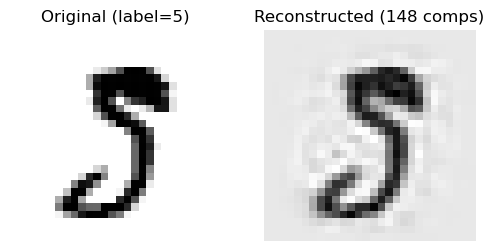

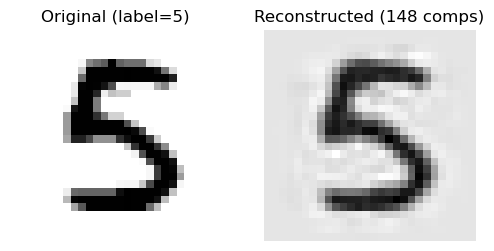

In [18]:
plot_digit_reconstruction(0, pca_95, X_mnist_train, y_mnist_train)
plot_digit_reconstruction(10, pca_95, X_mnist_train, y_mnist_train)

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [20]:
# Your code here
# ---- KNN without dimensionality reduction ----
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_mnist_train, y_mnist_train)
y_pred_no_pca = knn_no_pca.predict(X_mnist_test)
acc_no_pca = accuracy_score(y_mnist_test, y_pred_no_pca)

print(f"KNN accuracy without PCA: {acc_no_pca:.4f}")


# ---- KNN with PCA (preserve 80% variance) ----
pca_80 = PCA(n_components=0.80, random_state=42)
X_train_pca80 = pca_80.fit_transform(X_mnist_train)
X_test_pca80 = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_test_pca80)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)

print(f"KNN accuracy with PCA (80% variance): {acc_pca:.4f}")
print(f"Number of components kept: {pca_80.n_components_}")


KNN accuracy without PCA: 0.9429
KNN accuracy with PCA (80% variance): 0.9457
Number of components kept: 42


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

C:\Users\jerry\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


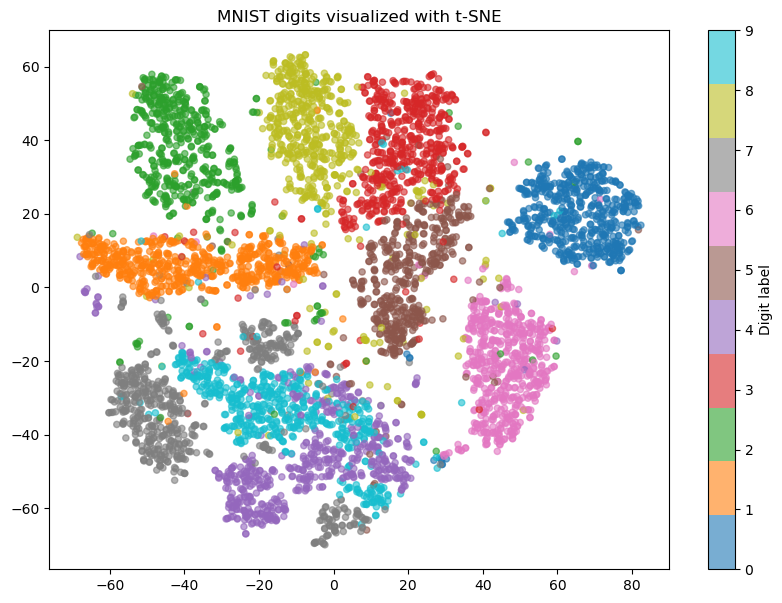

In [22]:
# Your code here
from sklearn.manifold import TSNE
# Run t-SNE (2D for visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_mnist_train)

# Scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_mnist_train, cmap="tab10", alpha=0.6, s=20)
plt.colorbar(scatter, ticks=range(10), label="Digit label")
plt.title("MNIST digits visualized with t-SNE")
plt.show()

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [23]:
# Your code here
from sklearn.manifold import TSNE

# Combine train + test
X_full = np.vstack((X_mnist_train, X_mnist_test))
y_full = np.hstack((y_mnist_train, y_mnist_test))

# Run t-SNE on the full data (reduce to 2D or more dims if you like)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_full_tsne = tsne.fit_transform(X_full)

# Split back into train/test embeddings
X_train_tsne = X_full_tsne[:len(X_mnist_train)]
X_test_tsne  = X_full_tsne[len(X_mnist_train):]

# Train KNN on t-SNE embeddings
knn_tsne = KNeighborsClassifier(n_neighbors=3)
knn_tsne.fit(X_train_tsne, y_mnist_train)

# Predict on test set
y_pred_tsne = knn_tsne.predict(X_test_tsne)

# Evaluate accuracy
acc_tsne = accuracy_score(y_mnist_test, y_pred_tsne)
print(f"KNN accuracy on t-SNE embeddings: {acc_tsne:.4f}")


C:\Users\jerry\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


KNN accuracy on t-SNE embeddings: 0.9400


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [24]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn

     ---------------------------------------- 0.0/18.3 MB ? eta -:--:--
     --- ------------------------------------ 1.6/18.3 MB 10.7 MB/s eta 0:00:02
     --------- ------------------------------ 4.5/18.3 MB 12.4 MB/s eta 0:00:02
     ----------------- ---------------------- 8.1/18.3 MB 14.5 MB/s eta 0:00:01
     ------------------------------- ------- 14.9/18.3 MB 19.1 MB/s eta 0:00:01
     --------------------------------------- 18.3/18.3 MB 20.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + C:\Users\jerry\anaconda3\python.exe C:\Users\jerry\AppData\Local\Temp\pip-install-7hxbaabw\numpy_4e8473e3700f47b4adaa5e060f8330ce\vendored-meson\meson\meson.py setup C:\Users\jerry\AppData\Local\Temp\pip-install-7hxbaabw\numpy_4e8473e3700f47b4adaa5e060f8330ce C:\Users\jerry\AppData\Local\Temp\pip-install-7hxbaabw\numpy_4e8473e3700f47b4adaa5e060f8330ce\.mesonpy-bzuvnaqp -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\jerry\AppData\Local\Temp\pip-install-7hxbaabw\numpy_4e8473e3700f47b4adaa5e060f8330ce\.mesonpy-bzuvnaqp\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\jerry\AppData\Local\Temp\pip-install-7hxbaabw\numpy_4e8473e3700f47b4adaa5e060f8330ce
  Build dir: C:\Users\jerry\AppData\Local\Temp\pip-install-7hxbaabw\numpy_4e8473e3700f47b4adaa5e060f8330ce\.mesonpy-b


   ---------------------------------------- 2/2 [umap-learn]

Note: you may need to restart the kernel to use updated packages.


C:\Users\jerry\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


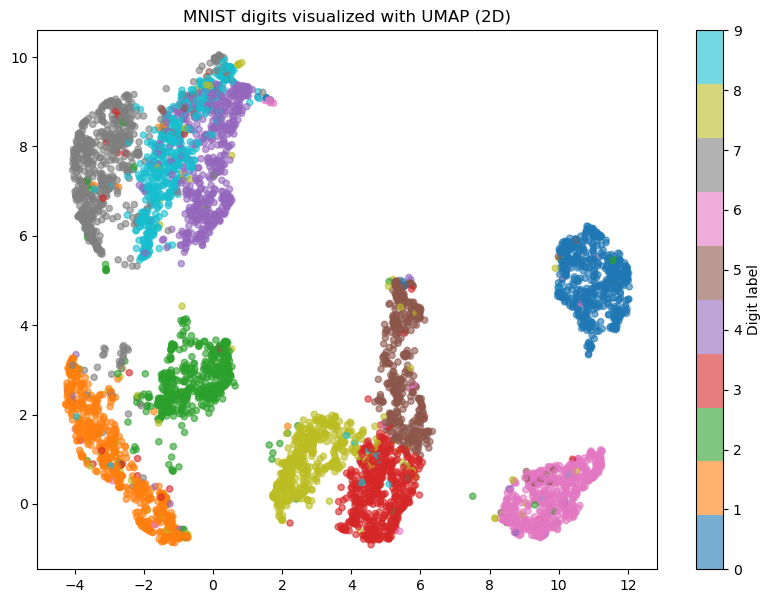

In [25]:
# Your code here
import umap.umap_ as umap

# Fit UMAP on the training set
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_train_umap2d = umap_2d.fit_transform(X_mnist_train)
X_test_umap2d  = umap_2d.transform(X_mnist_test)

# Plot training set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_umap2d[:,0], X_train_umap2d[:,1],
                      c=y_mnist_train, cmap="tab10", alpha=0.6, s=20)
plt.colorbar(scatter, ticks=range(10), label="Digit label")
plt.title("MNIST digits visualized with UMAP (2D)")
plt.show()


Now, calculate accuracy with KNN.

In [26]:
# Your code here
# UMAP for dimensionality reduction to 30D
umap_30d = umap.UMAP(n_components=30, random_state=42)
X_train_umap30 = umap_30d.fit_transform(X_mnist_train)
X_test_umap30  = umap_30d.transform(X_mnist_test)

# Train KNN on UMAP embeddings
knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_train_umap30, y_mnist_train)

# Predict
y_pred_umap = knn_umap.predict(X_test_umap30)

# Accuracy
acc_umap = accuracy_score(y_mnist_test, y_pred_umap)
print(f"KNN accuracy on UMAP embeddings (30D): {acc_umap:.4f}")


C:\Users\jerry\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN accuracy on UMAP embeddings (30D): 0.9121


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


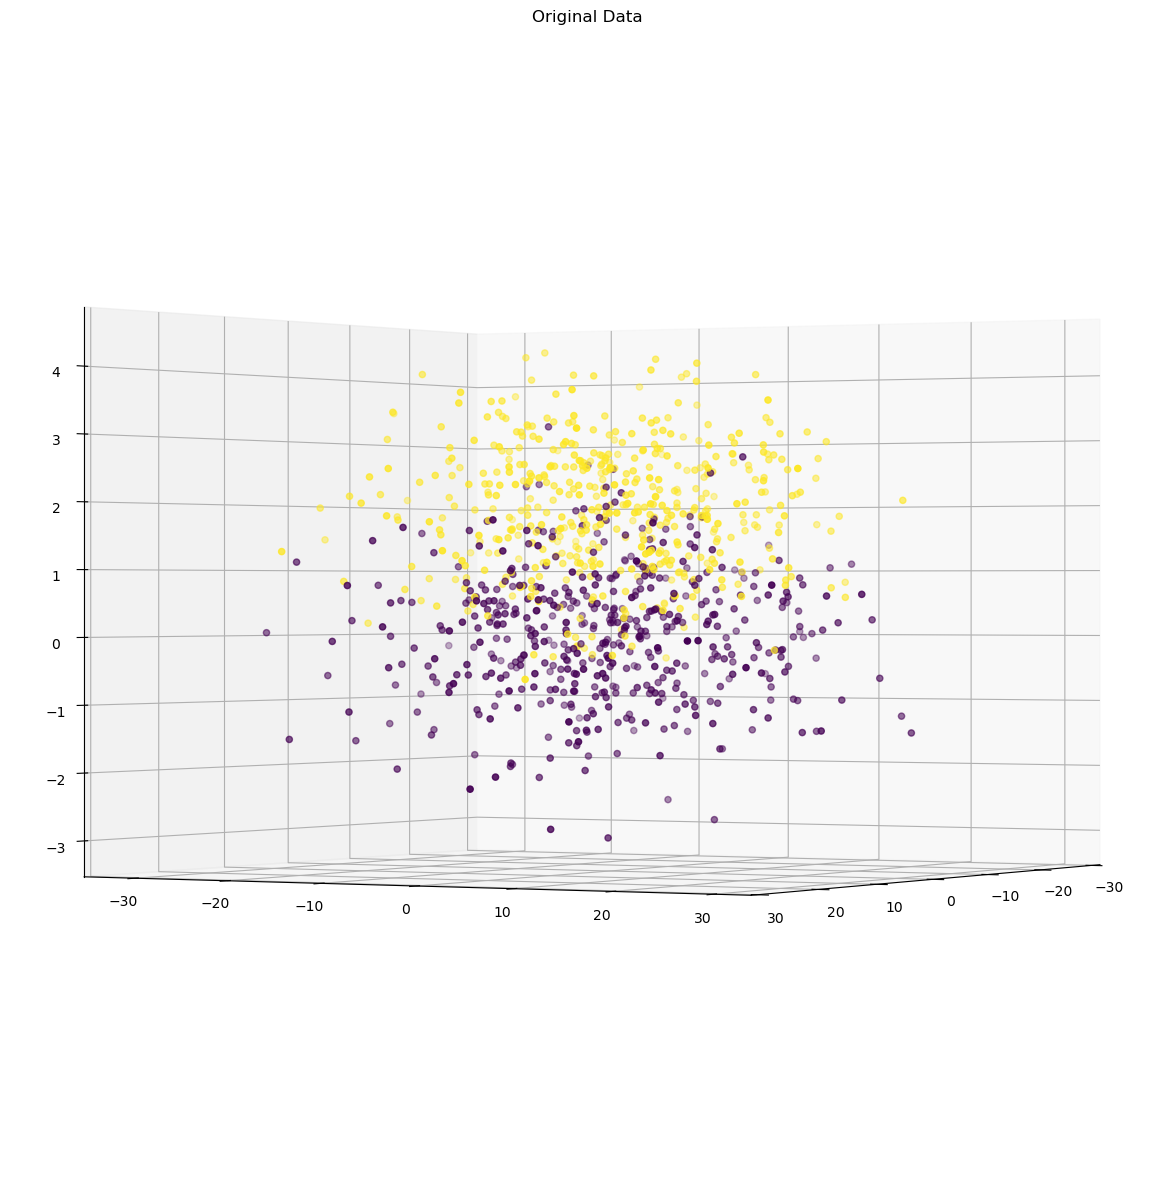

In [27]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [28]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

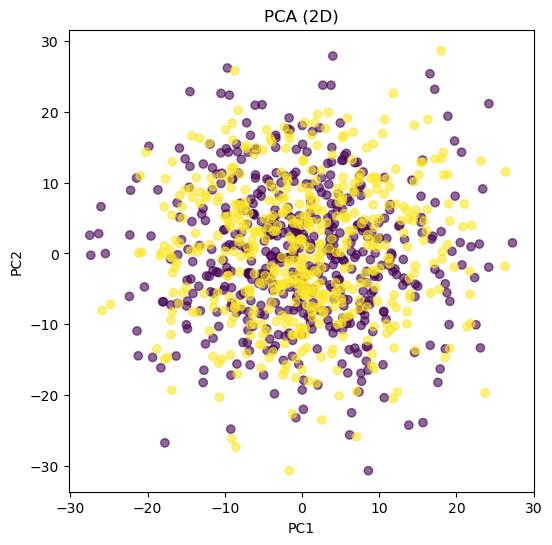

PCA (2 components) Accuracy: 0.6810


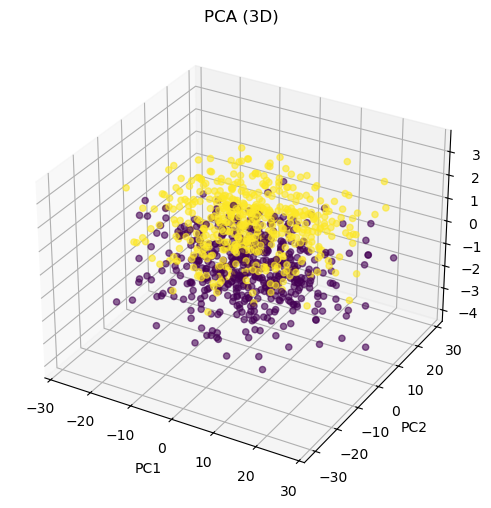

PCA (3 components) Accuracy: 0.8440


In [32]:
# Your code here
for n in [2, 3]:
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_pca, y)
    y_pred = knn.predict(X_pca)

    # Visualization
    if n == 2:
        plt.figure(figsize=(6,6))
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.6)
        plt.title("PCA (2D)")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.show()

    elif n == 3:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap="viridis", alpha=0.6)
        ax.set_title("PCA (3D)")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
        plt.show()

    print(f"PCA ({n} components) Accuracy: {accuracy_score(y, y_pred):.4f}")

In [ ]:
# Your code here


2. Try with UMAP.

C:\Users\jerry\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (2 components) Accuracy: 0.7660


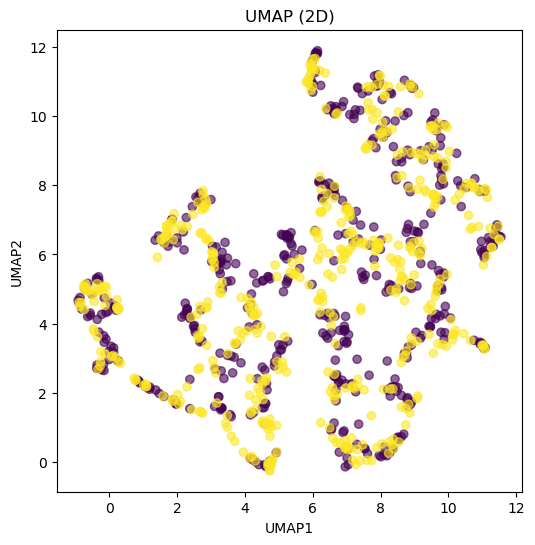

C:\Users\jerry\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (3 components) Accuracy: 0.7740


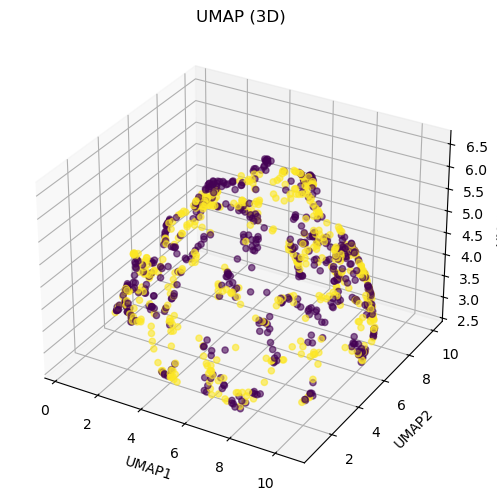

In [34]:
# Your code here
for n in [2, 3]:
    reducer = umap.UMAP(n_components=n, random_state=42, n_neighbors=15, min_dist=0.1)
    X_umap = reducer.fit_transform(X)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_umap, y)
    y_pred = knn.predict(X_umap)

    print(f"UMAP ({n} components) Accuracy: {accuracy_score(y, y_pred):.4f}")

    # Visualization
    if n == 2:
        plt.figure(figsize=(6,6))
        plt.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap="viridis", alpha=0.6)
        plt.title("UMAP (2D)")
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.show()

    elif n == 3:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], c=y, cmap="viridis", alpha=0.6)
        ax.set_title("UMAP (3D)")
        ax.set_xlabel("UMAP1")
        ax.set_ylabel("UMAP2")
        ax.set_zlabel("UMAP3")
        plt.show()


In [ ]:
# Your code here


Explain your results in the cell below.  Which works better?  Why?

*Enter your answer in this cell*

PCA performs better here because the class difference lies mainly in the z-dimension, which is exactly its sweet spot: capturing linear, axis-aligned variance. UMAP, however, focuses on preserving local neighborhood structure. With the large, noisy spread in x and y dominating distances, the modest z-shift that separates the classes gets supressed. As a result, UMAP blends the two classes together, while PCA, by emphasizing variance, isolates the separation more clearly.